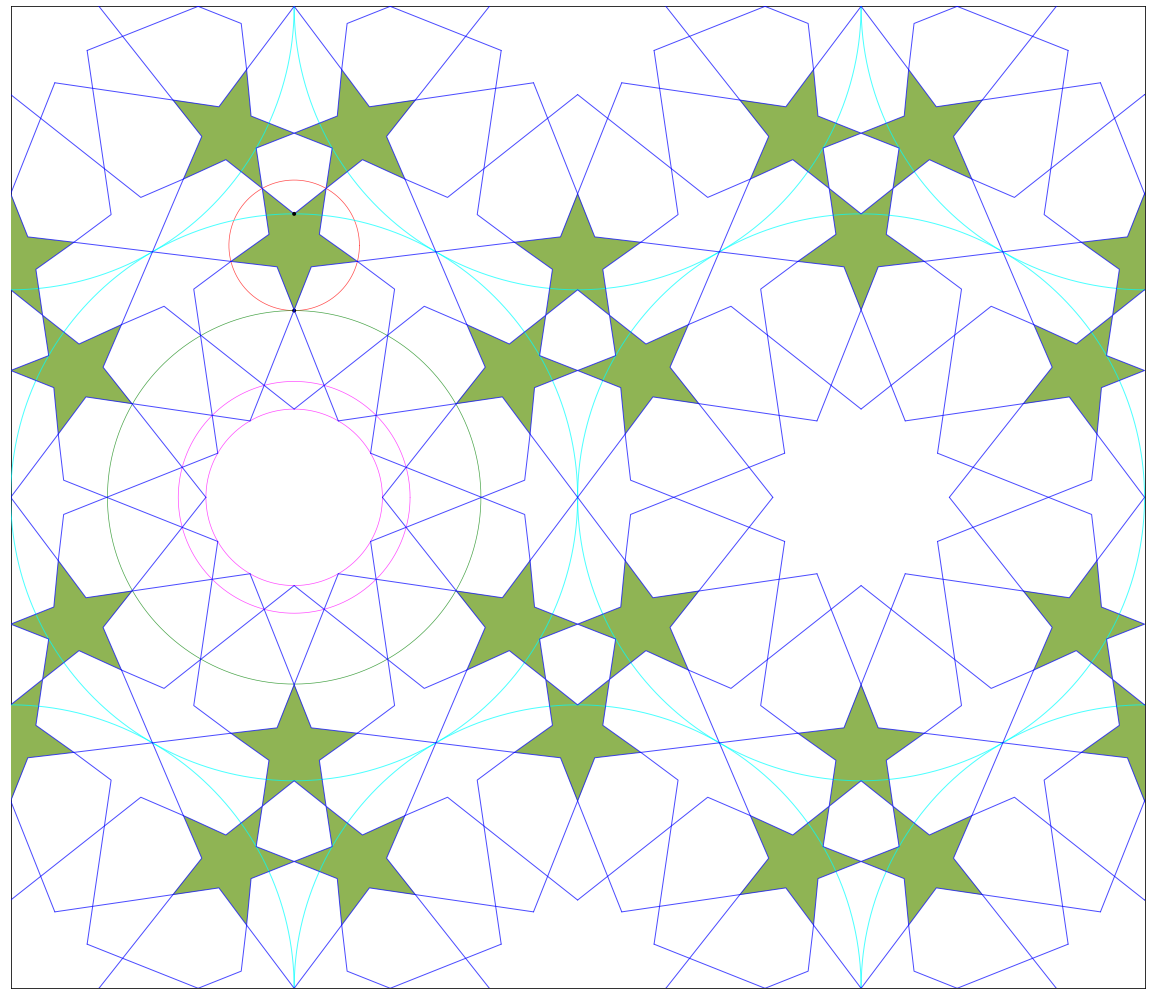

In [1]:
# (home)/Anthony-J-Lee/
# A_J_Lee_pattern-final-new-1.ipynb
# this program use (r0, -r0*np.sqrt(3)) as center of 12瓣玫瑰紋飾
#
# 2021-11-01
# python 3.8.2
#
# run on https://repl.it
# run on ubuntu 18.04 LTS
#
# 要執行本程式, 請按上方run▶
#
# to fix matplotlib warning
import os
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
#
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.font_manager as fontManager
from shapely import affinity
from shapely.geometry import LineString, Point
#
# 定義圖面函數
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin = 1.6   # cm
    right_margin = 1.6  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 1.6    # cm
    bottom_margin = 1.6 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
    #
# end of def
#
# Define the arc
# center position is cxy = (cx, cy)
# start_angle, end_angle is in degrees
#
def shapely_Arc(cxy, r, start_angle, end_angle) :
    #
    numsegments = 1440
    # The coordinates of the arc
    theta = np.radians(np.linspace(start_angle, end_angle, numsegments))
    x = cxy[0] + r * np.cos(theta)
    y = cxy[1] + r * np.sin(theta)
    Arc = LineString(np.column_stack([x, y]))
    return Arc
    #
# end of def
#
def motif_line(LS, COLOR, ZORDER, LINEWIDTH) :
    #
    xs, ys = LS.xy
    ax.plot(xs, ys, color=COLOR, alpha=0.7, linewidth=LINEWIDTH, solid_capstyle='round', zorder=ZORDER)
    return
# end def
#
def motif_fill(LS, color, ZORDER, Alpha) :
    #
    xs, ys = LS.xy
    ax.fill(xs, ys, alpha=Alpha, closed=True, edgecolor=None, facecolor=color, fill=True, zorder=ZORDER)
    return
#
# ------------------------------------------------------------
#
# A4 紙張大小是 21.0cm x 29.7cm
# dy = r0+ty
dx = 5.0
dy = 8.660254037844386
tup7 = set_graphic_area(8*dx, 4*dy)
# 呼叫 pyplot.figure(), 建立一個圖表物件, 並成為目前圖表物件
fig = plot.figure(figsize=(tup7[0], tup7[1]))
# 圖表的繪圖區域被分為1個子圖, 1 row, 1 column, plot to index 1
ax = fig.add_subplot(1,1,1)
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
# 設定X軸的顯示範圍, from xmin to xmax
plot.xlim(-1*dx, 7*dx)
# 設定Y軸的顯示範圍, from ymin to ymax
plot.ylim(-3*dy, 1*dy)
# get current axes, set X,Y same ratio & scale
plot.gca().set_aspect('equal', adjustable='box') 
#
xvalues = []
yvalues = []
plot.xticks(xvalues)
plot.yticks(yvalues)
plot.tick_params(labelsize=14)
#
plot.grid(False)
ax.set_axis_on()    # will turn on  grid line
# ax.set_axis_off() # will turn off grid line
#
plot.savefig('./png3/final-0.png',format="png",dpi=300)
#
# -----------------------------------------------------
#
r0 = 5
cxy = (0,0)
#
pA = ( r0, r0*np.sqrt(3))
pB = (-r0, r0*np.sqrt(3))
pC = (-r0,-r0*np.sqrt(3))
pD = ( r0,-r0*np.sqrt(3))
#
line_1 = LineString([pA, pC])
line_2 = LineString([pB, pD])
line_3 = affinity.rotate(line_2, -15, pD)
line_4 = affinity.rotate(line_2, -45, pD)
#
up_H_line_1_xy = [(-3*r0,r0*np.sqrt(3)), (3*r0,r0*np.sqrt(3))]
up_H_line_2_xy = [(-1*r0,r0*np.sqrt(3)), (5*r0,r0*np.sqrt(3))]
up_H_line_1    = LineString(up_H_line_1_xy)
up_H_line_2    = LineString(up_H_line_2_xy)
up_H_line_1_rP30 = affinity.rotate(up_H_line_1, 30, ( 3*r0, r0*np.sqrt(3)))
up_H_line_2_rN30 = affinity.rotate(up_H_line_2,-30, (-1*r0, r0*np.sqrt(3)))
#
V_line_L = LineString([( -r0,-r0*np.sqrt(3)), (-r0,  r0*np.sqrt(3))])
V_line_R = LineString([(3*r0,-r0*np.sqrt(3)), (3*r0, r0*np.sqrt(3))])
#
its_L1 = V_line_L.intersection(up_H_line_1_rP30)
its_R1 = V_line_R.intersection(up_H_line_2_rN30)
its_L1_xy = (its_L1.x, its_L1.y)
its_R1_xy = (its_R1.x, its_R1.y)
#
line_RU_its_L1 = LineString([(3*r0, r0*np.sqrt(3)), its_L1_xy])
line_LU_its_R1 = LineString([( -r0, r0*np.sqrt(3)), its_R1_xy])
#
its_41 = line_RU_its_L1.intersection(line_3)
its_51 = line_LU_its_R1.intersection(line_4)
its_41_xy = ( its_41.x, its_41.y)
its_51_xy = ( its_51.x, its_51.y)
#
tmp_4 = LineString([its_41_xy, pD])
tmp_5 = LineString([its_51_xy, pD])
tmp_6 = affinity.rotate(tmp_4, 52.5, its_41_xy)
V_line = LineString([(r0,-r0*np.sqrt(3)), (r0,r0*np.sqrt(3))])
cir_L  = shapely_Arc((1*r0,-1*r0*np.sqrt(3)), 2*r0,   0, 360)
#
its_61 = V_line.intersection(tmp_6)
its_62 = cir_L.intersection(tmp_6)
its_61_xy = ( its_61.x, its_61.y)
tmp_7 = LineString([its_41_xy, its_61_xy])
#
d99 = its_61.distance(its_62)
cir_center = shapely_Arc(its_61_xy, d99, 0, 360)
motif_line(cir_center, 'red', 10, 0.7)
#
its_70 = V_line.intersection(cir_center)
its_71 = its_70[0]
d999 = its_71.distance(Point(pD))
cir_down_2 = shapely_Arc((r0,-r0*np.sqrt(3)), d999, 0, 360)
motif_line(cir_down_2, 'green', 10, 0.7)
#
cir_L     = shapely_Arc((1*r0,-1*r0*np.sqrt(3)), 2*r0,   0, 360)
cir_R     = shapely_Arc((5*r0,-1*r0*np.sqrt(3)), 2*r0,   0, 360)
cir_upL   = shapely_Arc(( -r0, 1*r0*np.sqrt(3)), 2*r0, 270, 360)
cir_upMid = shapely_Arc((3*r0, 1*r0*np.sqrt(3)), 2*r0, 180, 360)
cir_upR   = shapely_Arc((7*r0, 1*r0*np.sqrt(3)), 2*r0, 180, 270)
cir_dwL   = shapely_Arc(( -r0,-3*r0*np.sqrt(3)), 2*r0,   0,  90)
cir_dwMid = shapely_Arc((3*r0,-3*r0*np.sqrt(3)), 2*r0,   0, 180)
cir_dwR   = shapely_Arc((7*r0,-3*r0*np.sqrt(3)), 2*r0,  90, 180)
#
motif_line(cir_L,    'cyan', 10, 1.0)
motif_line(cir_R,    'cyan', 10, 1.0)
motif_line(cir_upL,  'cyan', 10, 1.0)
motif_line(cir_upMid,'cyan', 10, 1.0)
motif_line(cir_upR,  'cyan', 10, 1.0)
motif_line(cir_dwL,  'cyan', 10, 1.0)
motif_line(cir_dwMid,'cyan', 10, 1.0)
motif_line(cir_dwR,  'cyan', 10, 1.0)
#
# new_center is (r0, -r0**np.sqrt(3))
#
r10 = 8.92
point_1_xy = (r0+r10, 0-r0*np.sqrt(3))
point_2_xy = (r0+r10*np.cos(5*np.pi/12), r10*np.sin(5*np.pi/12)-r0*np.sqrt(3))
point_3_xy = (r0+r10*np.cos(7*np.pi/12), r10*np.sin(7*np.pi/12)-r0*np.sqrt(3))
point_1    = Point(point_1_xy)
point_2    = Point(point_2_xy)
point_3    = Point(point_3_xy)
#
line_p2_p3 = LineString([point_2_xy, point_3_xy])
d1 = point_2.distance(point_3) / 2
d2 = r10 - d1
#
Hline = LineString([(r0+r10+d1, 0-r0*np.sqrt(3)), (r0-r10-d1, 0-r0*np.sqrt(3))])
line_left  = affinity.rotate(Hline,105, (r0,-r0*np.sqrt(3)))
line_right = affinity.rotate(Hline, 75, (r0,-r0*np.sqrt(3)))
#
mid_1 = line_p2_p3.interpolate(0.5, normalized = True)
mid_2 = affinity.rotate(mid_1, 90-15, point_2_xy)
mid_1_xy = (mid_1.x, mid_1.y)
mid_2_xy = (mid_2.x, mid_2.y)
line_mid_1_to_2 = LineString([mid_1_xy, mid_2_xy])
#
bisector_degree = (90-15)/2
line_A = affinity.rotate(line_p2_p3, bisector_degree, point_2_xy)
line_B = affinity.rotate(line_p2_p3,-bisector_degree, point_3_xy)
#
its_1    = line_A.intersection(line_B)
its_1_xy = (its_1.x, its_1.y)
#
line_a   = LineString([point_2_xy, its_1_xy])
line_b   = LineString([point_3_xy, its_1_xy])
#
its_2    = line_a.intersection(line_mid_1_to_2)
its_2_xy = (its_2.x, its_2.y)
#
tmp_1_xy = (mid_2.x, point_2_xy[1])
tmp_2_xy = (mid_2.x, -r0*np.sqrt(3))
line_tmp = LineString([tmp_1_xy, tmp_2_xy])
#
its_3    = line_a.intersection(line_tmp)
its_3_xy = (its_3.x, its_3.y)
#
line_base = LineString([its_2_xy, its_3_xy])
d_its2_to_its3 = its_2.distance(its_3)
distance = d_its2_to_its3 - 0.24
#
key_posi = line_base.interpolate(distance)
key_posi_xy = (key_posi.x, key_posi.y)
key_cir_2 = shapely_Arc(key_posi_xy, 0.07, 0, 360)
#
t0x = mid_2.x - key_posi.x
t0y = mid_2.y - key_posi.y
ext_0 = affinity.translate(mid_2, 10*t0x, 10*t0y, 0)
line_mid_2_to_ext_0 = LineString([mid_2_xy, (ext_0.x,ext_0.y)])
ext_p0 = line_mid_2_to_ext_0.intersection(Hline)
ext_p0_xy = (ext_p0.x, ext_p0.y)
#
line_key = LineString([mid_1_xy, key_posi_xy, mid_2_xy, ext_p0_xy])
#
hline = LineString([(r0,-r0*np.sqrt(3)), (r0+r10,-r0*np.sqrt(3))])
r45_Hline = affinity.rotate(hline, 45, (r0,-r0*np.sqrt(3)))
r60_Hline = affinity.rotate(hline, 60, (r0,-r0*np.sqrt(3)))
#
its_4 = line_key.intersection(r45_Hline)
its_5 = line_key.intersection(r60_Hline)
d4 = its_4.distance(Point(r0,-r0*np.sqrt(3)))
d5 = its_5.distance(Point(r0,-r0*np.sqrt(3)))
#
d4_cir = shapely_Arc((r0,-r0*np.sqrt(3)), d4, 0, 360)
d5_cir = shapely_Arc((r0,-r0*np.sqrt(3)), d5, 0, 360)
motif_line(d4_cir, 'magenta', 30, 0.7)
motif_line(d5_cir, 'magenta', 30, 0.7)
#
plot.savefig('./png3/final-1.png',format="png",dpi=300)
#
its_4_xy = (its_4.x, its_4.y)
its_5_xy = (its_5.x, its_5.y)
key_1_xy = [its_4_xy, key_posi_xy, mid_1_xy]
key_2_xy = [(2*r0-key_posi_xy[0], key_posi_xy[1]), (2*r0-its_4_xy[0], its_4_xy[1])]
line_key_xy = key_1_xy + key_2_xy
line_key    = LineString(line_key_xy)
#
t1x = mid_1.x - key_posi.x
t1y = mid_1.y - key_posi.y
ext_1 = affinity.translate(mid_1, 5*t1x, 5*t1y, 0)
ext_1_xy = ( ext_1.x, ext_1.y)
ext_2_xy = (-ext_1.x, ext_1.y)
#
for degree in (0,30,60,90,120,150,180,210,240,270,300,330) :
    r_line_key = affinity.rotate(line_key, degree+15, (r0,-r0*np.sqrt(3)))
    motif_line(r_line_key, 'blue', 55, 1.0)
# end for
#
its_201    = line_left.intersection(cir_L)[0]
its_201_xy = (its_201.x, its_201.y)
#
r30_mid_1    = affinity.rotate(mid_1, 30, (r0,-r0*np.sqrt(3)))
r30_mid_1_xy = (r30_mid_1.x, r30_mid_1.y)
up_motif_xy = [mid_1_xy, its_201_xy, r30_mid_1_xy]
up_motif   = LineString(up_motif_xy)
final_up_motif = affinity.rotate(up_motif, 15, (r0,-r0*np.sqrt(3)))
#
for i in (0,1,2,3,4,5) :
    r1_up_motif = affinity.rotate(final_up_motif, i*60, (r0,-r0*np.sqrt(3)))
    motif_line(r1_up_motif, 'blue', 55, 1.0)
# end for
#
plot.savefig('./png3/final-2.png',format="png",dpi=300)
#
posi_2 = affinity.rotate(its_201, 15+0*60, (1*r0,-1*r0*np.sqrt(3)))
posi_3 = affinity.rotate(its_201, 15+2*60, (1*r0,-1*r0*np.sqrt(3)))
posi_4 = affinity.rotate(its_201, 15+3*60, (1*r0,-1*r0*np.sqrt(3)))
posi_5 = affinity.rotate(its_201, 15+4*60, (1*r0,-1*r0*np.sqrt(3)))
posi_6 = affinity.rotate(its_201, 15+5*60, (1*r0,-1*r0*np.sqrt(3)))
#
posi_2_xy = (posi_2.x, posi_2.y)
posi_3_xy = (posi_3.x, posi_3.y)
posi_4_xy = (posi_4.x, posi_4.y)
posi_5_xy = (posi_5.x, posi_5.y)
posi_6_xy = (posi_6.x, posi_6.y)
#
tx_7 = 6*r0
ty_7 = 2*r0*np.sqrt(3)
tx_8 = 6*r0
ty_8 =-2*r0*np.sqrt(3)
#
for degree in (0,30,60,90,120,150,180,210,240,270,300,330) :
    r1_line_key = affinity.rotate(line_key, degree+15, (r0,-r0*np.sqrt(3)))
    #
    r2_line_key = affinity.rotate(r1_line_key, 180, posi_2_xy)
    r3_line_key = affinity.rotate(r1_line_key, 180, posi_3_xy)
    r4_line_key = affinity.rotate(r1_line_key, 180, posi_4_xy)
    r5_line_key = affinity.rotate(r1_line_key, 180, posi_5_xy)
    r6_line_key = affinity.rotate(r1_line_key, 180, posi_6_xy)
    t7_line_key = affinity.translate(r1_line_key, tx_7, ty_7)
    t8_line_key = affinity.translate(r1_line_key, tx_8, ty_8)
    #
    motif_line(r2_line_key, 'blue', 55, 1.0)
    motif_line(r3_line_key, 'blue', 55, 1.0)
    motif_line(r4_line_key, 'blue', 55, 1.0)
    motif_line(r5_line_key, 'blue', 55, 1.0)
    motif_line(r6_line_key, 'blue', 55, 1.0)
    motif_line(t7_line_key, 'blue', 55, 1.0)
    motif_line(t8_line_key, 'blue', 55, 1.0)
# end for
#
for i in (0,1,2,3,4,5) :
    r1_up_motif = affinity.rotate(final_up_motif, i*60, (r0,-r0*np.sqrt(3)))
    #
    r2_up_motif = affinity.rotate(r1_up_motif, 180, posi_2_xy)
    r3_up_motif = affinity.rotate(r1_up_motif, 180, posi_3_xy)
    r4_up_motif = affinity.rotate(r1_up_motif, 180, posi_4_xy)
    r5_up_motif = affinity.rotate(r1_up_motif, 180, posi_5_xy)
    r6_up_motif = affinity.rotate(r1_up_motif, 180, posi_6_xy)
    t7_up_motif = affinity.translate(r1_up_motif, tx_7, ty_7)
    t8_up_motif = affinity.translate(r1_up_motif, tx_8, ty_8)    
    #
    motif_line(r2_up_motif, 'blue', 55, 1.0)
    motif_line(r3_up_motif, 'blue', 55, 1.0)
    motif_line(r4_up_motif, 'blue', 55, 1.0)
    motif_line(r5_up_motif, 'blue', 55, 1.0)
    motif_line(r6_up_motif, 'blue', 55, 1.0)
    motif_line(t7_up_motif, 'blue', 55, 1.0)
    motif_line(t8_up_motif, 'blue', 55, 1.0)    
# end for
#
plot.savefig('./png3/final-3.png',format="png",dpi=300)
#

V_line = LineString([(r0,-r0*np.sqrt(3)), (r0,r0*np.sqrt(3))])
its_63 = V_line.intersection(cir_L)
its_63_xy = (its_63.x, its_63.y)
posi_start = shapely_Arc((r0,-r0*np.sqrt(3)+d999), 0.07, 0, 360)
posi_end   = shapely_Arc(its_63_xy, 0.07, 0, 360)
motif_fill(posi_start, 'black', 55, 1.0)
motif_fill(posi_end,   'black', 55, 1.0)
#
plot.savefig('./png3/final-4.png',format="png",dpi=300)
#
a_line_key = affinity.rotate(line_key,   0+15, (r0,-r0*np.sqrt(3)))
b_line_key = affinity.rotate(line_key, 330+15, (r0,-r0*np.sqrt(3)))
posi_start_xy = (r0,-r0*np.sqrt(3)+d999)
posi_end_xy   = its_63_xy
#
star_1_xy = [a_line_key.coords[2],a_line_key.coords[1],posi_start_xy,b_line_key.coords[3], b_line_key.coords[2]]
star_2_xy = [posi_start_xy, b_line_key.coords[3], b_line_key.coords[2]]
star_2    = LineString(star_2_xy)
star_2t   = affinity.rotate(star_2, 75, its_61_xy)
star_2_xy = [star_2t.coords[1], star_2t.coords[2], posi_end_xy]
#
star_3_xy = [a_line_key.coords[2],a_line_key.coords[1]]
star_3    = LineString(star_3_xy)
star_3t   = affinity.rotate(star_3, -75, its_61_xy)
star_3_xy = [star_3t.coords[0],star_3t.coords[1], a_line_key.coords[2]]
#
star_xy   = star_1_xy + star_2_xy + star_3_xy
star_body = LineString(star_xy)
#
star_frame_xy = [b_line_key.coords[2]] + star_2_xy + star_3_xy
star_frame = LineString(star_frame_xy)
#
my_green = (143/255, 180/255, 84/255)
for i in (0,1,2,3,4,5) :
    r1_star_body  = affinity.rotate(star_body , i*60, (r0,-r0*np.sqrt(3)))
    r1_star_frame = affinity.rotate(star_frame, i*60, (r0,-r0*np.sqrt(3)))
    #
    r2_star_body = affinity.rotate(r1_star_body, 180, posi_2_xy)
    r3_star_body = affinity.rotate(r1_star_body, 180, posi_3_xy)
    r4_star_body = affinity.rotate(r1_star_body, 180, posi_4_xy)
    r5_star_body = affinity.rotate(r1_star_body, 180, posi_5_xy)
    r6_star_body = affinity.rotate(r1_star_body, 180, posi_6_xy)
    t7_star_body = affinity.translate(r1_star_body, tx_7, ty_7)
    t8_star_body = affinity.translate(r1_star_body, tx_8, ty_8)  
    #
    r2_star_frame = affinity.rotate(r1_star_frame, 180, posi_2_xy)
    r3_star_frame = affinity.rotate(r1_star_frame, 180, posi_3_xy)
    r4_star_frame = affinity.rotate(r1_star_frame, 180, posi_4_xy)
    r5_star_frame = affinity.rotate(r1_star_frame, 180, posi_5_xy)
    r6_star_frame = affinity.rotate(r1_star_frame, 180, posi_6_xy)
    t7_star_frame = affinity.translate(r1_star_frame, tx_7, ty_7)
    t8_star_frame = affinity.translate(r1_star_frame, tx_8, ty_8)      
    # 
    motif_fill(r1_star_body, my_green, 5, 1.0)
    motif_fill(r2_star_body, my_green, 5, 1.0)
    motif_fill(r3_star_body, my_green, 5, 1.0)
    motif_fill(r4_star_body, my_green, 5, 1.0)
    motif_fill(r5_star_body, my_green, 5, 1.0)
    motif_fill(r6_star_body, my_green, 5, 1.0)
    motif_fill(t7_star_body, my_green, 5, 1.0)
    motif_fill(t8_star_body, my_green, 5, 1.0)
    #
    motif_line(r1_star_frame, 'blue', 10, 1.0)
    motif_line(r2_star_frame, 'blue', 10, 1.0)
    motif_line(r3_star_frame, 'blue', 10, 1.0)
    motif_line(r4_star_frame, 'blue', 10, 1.0)
    motif_line(r5_star_frame, 'blue', 10, 1.0)
    motif_line(r6_star_frame, 'blue', 10, 1.0)
    motif_line(t7_star_frame, 'blue', 10, 1.0)
    motif_line(t8_star_frame, 'blue', 10, 1.0)    
# end for
#
plot.savefig('./png3/final-5.png',format="png",dpi=300)
#